# <span style="color:#00ff00;"> Hello, This cell is all about importing the datasets to the dataframes and looking at the data. So that I can do analysis on it. 

In [35]:
'''Simple, we can manipulate dataframes using pandas. dataframes are 2D arrays 
like spreadsheets or csv files. 
To perform the data analysis we must load the files or the datasets onto dataframes.
Here I have created a dataframe called Reading_data_transaction.
 pd.read_csv() reads the file and loads it into a pandas dataframe Reading_data_transaction'''
# Import pandas 
import pandas as pd

# Load dataframes from CSVs
transactions_data = pd.read_csv('transaction_data.csv')
demographic_data = pd.read_csv('hh_demographic.csv')
products_data = pd.read_csv('product.csv')

# Print top rows of each dataframe  
print(transactions_data.head())
print(demographic_data.head())
print(products_data.head())

# Print datatype info for transactions dataframe
print(transactions_data.info())
print(demographic_data.info())
print(products_data.info())

# Print the count of null values

   household_key    BASKET_ID  DAY  PRODUCT_ID  QUANTITY  SALES_VALUE  \
0           2375  26984851472    1     1004906         1         1.39   
1           2375  26984851472    1     1033142         1         0.82   
2           2375  26984851472    1     1036325         1         0.99   
3           2375  26984851472    1     1082185         1         1.21   
4           2375  26984851472    1     8160430         1         1.50   

   STORE_ID  RETAIL_DISC  TRANS_TIME  WEEK_NO  COUPON_DISC  COUPON_MATCH_DISC  
0       364        -0.60        1631        1          0.0                0.0  
1       364         0.00        1631        1          0.0                0.0  
2       364        -0.30        1631        1          0.0                0.0  
3       364         0.00        1631        1          0.0                0.0  
4       364        -0.39        1631        1          0.0                0.0  
  AGE_DESC MARITAL_STATUS_CODE INCOME_DESC HOMEOWNER_DESC      HH_COMP_DESC  \
0 

# <span style="color:black;">  Checking if there is any null values in the dataframes and printing the output 

In [40]:
#Checking and counting for null
print(transactions_data.isnull().count())
print(demographic_data.isnull().count())
print((products_data.isnull().count()))

household_key        2595732
BASKET_ID            2595732
DAY                  2595732
PRODUCT_ID           2595732
QUANTITY             2595732
SALES_VALUE          2595732
STORE_ID             2595732
RETAIL_DISC          2595732
TRANS_TIME           2595732
WEEK_NO              2595732
COUPON_DISC          2595732
COUPON_MATCH_DISC    2595732
dtype: int64
AGE_DESC               801
MARITAL_STATUS_CODE    801
INCOME_DESC            801
HOMEOWNER_DESC         801
HH_COMP_DESC           801
HOUSEHOLD_SIZE_DESC    801
KID_CATEGORY_DESC      801
household_key          801
dtype: int64
PRODUCT_ID              92353
MANUFACTURER            92353
DEPARTMENT              92353
BRAND                   92353
COMMODITY_DESC          92353
SUB_COMMODITY_DESC      92353
CURR_SIZE_OF_PRODUCT    92353
dtype: int64


In [13]:
Total_sales_per_basket = Reading_data_transaction.groupby('BASKET_ID')['SALES_VALUE'].sum()
print(avg_sales_per_basket)
'''It is important to know how much each household is spending per transaction or per Basket, as we can later on build upon this to more granular analysis by demographics and product data'''


BASKET_ID
26984851472     5.91
26984851516    12.43
26984896261    11.37
26984905972     2.55
26984945254     3.53
               ...  
42302712006     9.78
42302712189    33.64
42302712298    40.70
42305362497     5.61
42305362535    32.32
Name: SALES_VALUE, Length: 276484, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualising the distribution of sales values
sns.histplot(Reading_data_transaction['SALES_VALUE'], kde=True)
plt.title('Distribution of Sales Value')
plt.show()


In [5]:
demographic_df = pd.read_csv('hh_demographic.csv')
merged = demographic_df.merge(Reading_data_transaction, on='household_key') 

spend_by_income = merged.groupby('INCOME_DESC')[ 'SALES_VALUE'].sum()
print(spend_by_income)
'''This is like a join in sql, so we can merge 2 datasets based on the household_key column. 
Then we added all the sales values of each household based on the income column'''


INCOME_DESC
100-124K      201543.17
125-149K      300658.10
15-24K        303187.20
150-174K      251845.22
175-199K       94033.09
200-249K       28632.43
25-34K        380231.38
250K+         118688.90
35-49K        825945.47
50-74K       1094852.10
75-99K        558962.90
Under 15K     339136.30
Name: SALES_VALUE, dtype: float64


In [8]:
household_counts = merged.groupby('INCOME_DESC')['household_key'].nunique()
print((household_counts))
'''No of unique household_keys we have got the demographic data for. this is important to find out the most valuable customers'''

INCOME_DESC
100-124K      34
125-149K      38
15-24K        74
150-174K      30
175-199K      11
200-249K       5
25-34K        77
250K+         11
35-49K       172
50-74K       192
75-99K        96
Under 15K     61
Name: household_key, dtype: int64


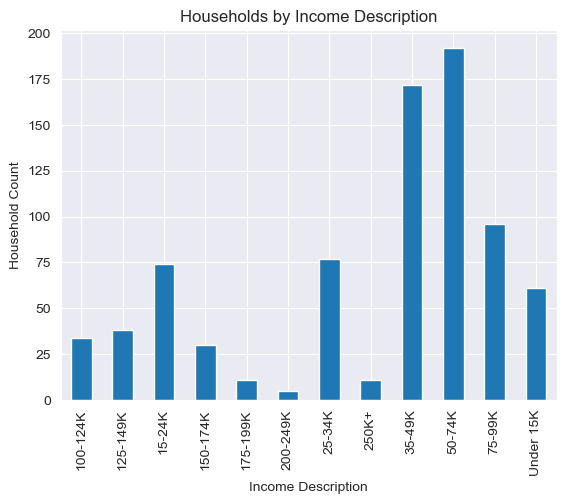

In [14]:
import matplotlib.pyplot as plt

household_counts.plot(kind='bar')
plt.title('Households by Income Description')
plt.xlabel('Income Description')
plt.ylabel('Household Count')
plt.show()
#This gives us a bar graph that displays the household_count by income description

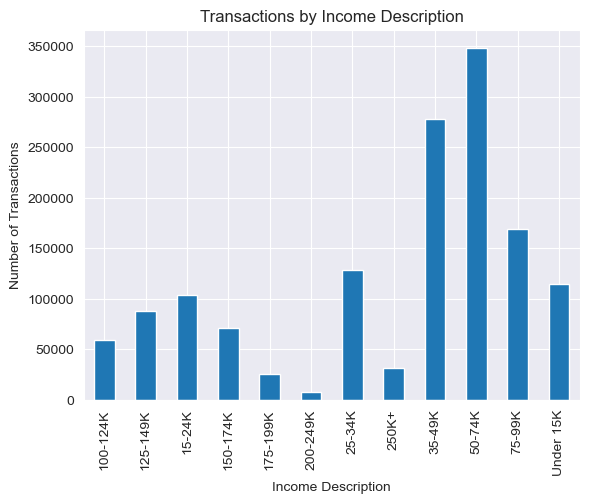

In [11]:
# Count transactions by income description
txns_by_income = merged.groupby('INCOME_DESC')['household_key'].count() 

# Plot bar chart
import matplotlib.pyplot as plt
txns_by_income.plot(kind='bar')
plt.title('Transactions by Income Description')
plt.xlabel('Income Description') 
plt.ylabel('Number of Transactions')
plt.show()


In [18]:
merged = Reading_data_transaction.merge(Reading_data_transaction_prod, on='PRODUCT_ID')


In [19]:
sales_by_category = merged.groupby('COMMODITY_DESC')['SALES_VALUE'].sum()


In [32]:
top5 = (merged
   .groupby('DEPARTMENT')['SALES_VALUE']
   .sum()
   .sort_values(ascending=False)
   .head(10)
)


In [33]:
print(top5)

DEPARTMENT
GROCERY            4093814.14
DRUG GM            1055358.03
PRODUCE             557452.11
MEAT                548786.81
KIOSK-GAS           544222.28
MEAT-PCKGD          412436.77
DELI                260866.51
PASTRY              121739.86
MISC SALES TRAN     119960.04
NUTRITION            97669.04
Name: SALES_VALUE, dtype: float64
